In [65]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
from matplotlib import pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
import random
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [35]:
# df = pd.read_csv('sales_train.csv', nrows = 100000, parse_dates = ['date'])
p = 0.01
df = pd.read_csv(
    'sales_train.csv',
     skiprows = lambda i: i > 0 and random.random() > p,
     parse_dates = ['date']
)

In [36]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-16,0,25,2833,599.00,1.00
1,2013-01-20,0,25,2090,449.00,1.00
2,2013-06-01,0,25,2179,299.00,1.00
3,2013-01-14,0,25,3402,549.00,1.00
4,2013-01-23,0,25,3402,549.00,1.00


In [37]:
df.shape

(29556, 6)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29556 entries, 0 to 29555
Data columns (total 6 columns):
date              29556 non-null datetime64[ns]
date_block_num    29556 non-null int64
shop_id           29556 non-null int64
item_id           29556 non-null int64
item_price        29556 non-null float64
item_cnt_day      29556 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 1.4 MB


In [39]:
df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,29556.00,29556.00,29556.00,29556.00,29556.00
mean,14.53,32.97,10206.85,888.84,1.24
std,9.46,16.30,6318.29,1691.40,1.54
min,0.00,0.00,16.00,0.10,-2.00
25%,6.00,22.00,4493.00,249.00,1.00
50%,14.00,31.00,9355.00,399.00,1.00
75%,23.00,47.00,15606.00,999.00,1.00
max,33.00,59.00,22167.00,34990.00,95.00


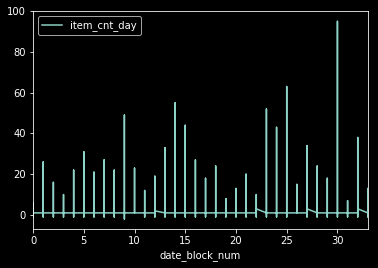

In [40]:
df.plot(x='date_block_num', y='item_cnt_day')

In [41]:
g = df.groupby(['date_block_num'])

In [42]:
# for month, items in g:
#     if month == 2:
#         print(items)

In [43]:
# groups = df.groupby(["date_block_num","shop_id","item_id"])

In [44]:
# for group, values in groups:
#     print(group)
#     print(values)

In [45]:
# groups[["item_price"]].mean()

In [46]:
monthly_sales = df.groupby(["date_block_num","shop_id","item_id"])[
    "date","item_price","item_cnt_day"].agg({"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})

In [47]:
monthly_sales.head()

date            item_price item_cnt_day
                                      min        max       mean          sum
date_block_num shop_id item_id                                              
0              0       484     2013-01-30 2013-01-30     124.00         1.00
                       1472    2013-05-01 2013-05-01    2127.00         1.00
                       2718    2013-06-01 2013-06-01     440.00         1.00
                       2956    2013-01-31 2013-01-31     452.00         1.00
                       3206    2013-01-19 2013-01-19      63.00         1.00

In [48]:
item = pd.read_csv('items.csv')

In [49]:
item.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [50]:
x = item.groupby(['item_category_id']).count()
x = x.sort_values(by = 'item_id', ascending = False)
x = x.reset_index()
x = x.iloc[0:10]

In [51]:
# x.head()
# x.item_category_id
# x.info()
# x.head()


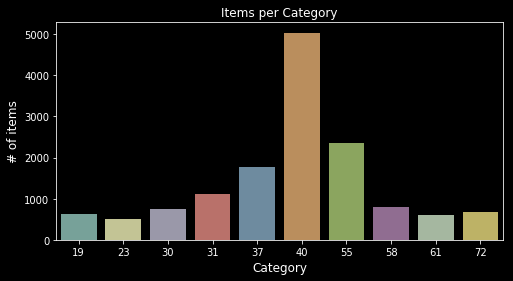

In [52]:
plt.figure(figsize = (8,4))
ax = sns.barplot(x['item_category_id'], x['item_id'], alpha = 0.8)
plt.title("Items per Category")
plt.ylabel('# of items', fontsize = 12)
plt.xlabel('Category', fontsize = 12)
plt.show()

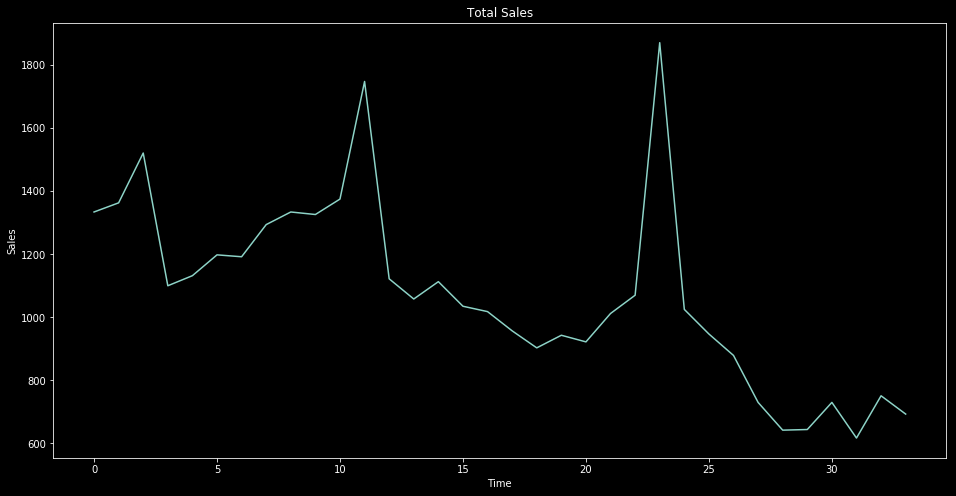

In [55]:
timeseries = df.groupby(['date_block_num'])['item_cnt_day'].sum()
plt.figure(figsize=(16,8))
plt.title('Total Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(timeseries)

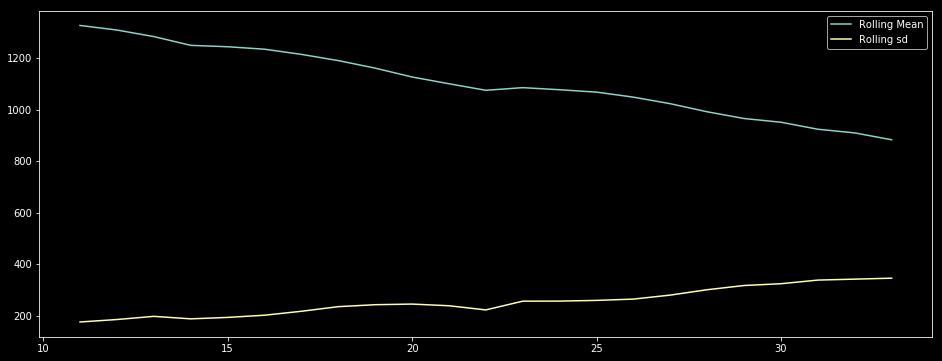

In [56]:
rolling_mean = timeseries.rolling(window=12,center=False).mean()
rolling_std = timeseries.rolling(window=12,center=False).std()
plt.figure(figsize=(16,6))
plt.plot(rolling_mean, label = 'Rolling Mean');
plt.plot(rolling_std, label = 'Rolling sd');
plt.legend();

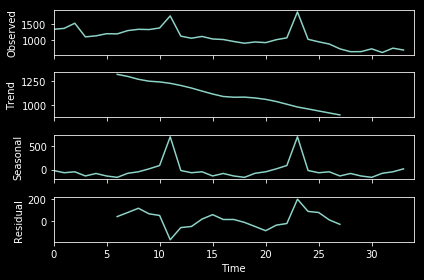

In [63]:
res = seasonal_decompose(timeseries.values, freq = 12)
fig = res.plot()

In [66]:
def test_stationarity(timeseries):
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(timeseries)

Results of Dickey-Fuller Test:
Test Statistic                -2.63
p-value                        0.09
#Lags Used                     0.00
Number of Observations Used   33.00
Critical Value (1%)           -3.65
Critical Value (5%)           -2.95
Critical Value (10%)          -2.62
dtype: float64


In [73]:
def difference(dataset, interval = 1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

def inverse_difference(last_ob, value):
    return value + last_ob

[]

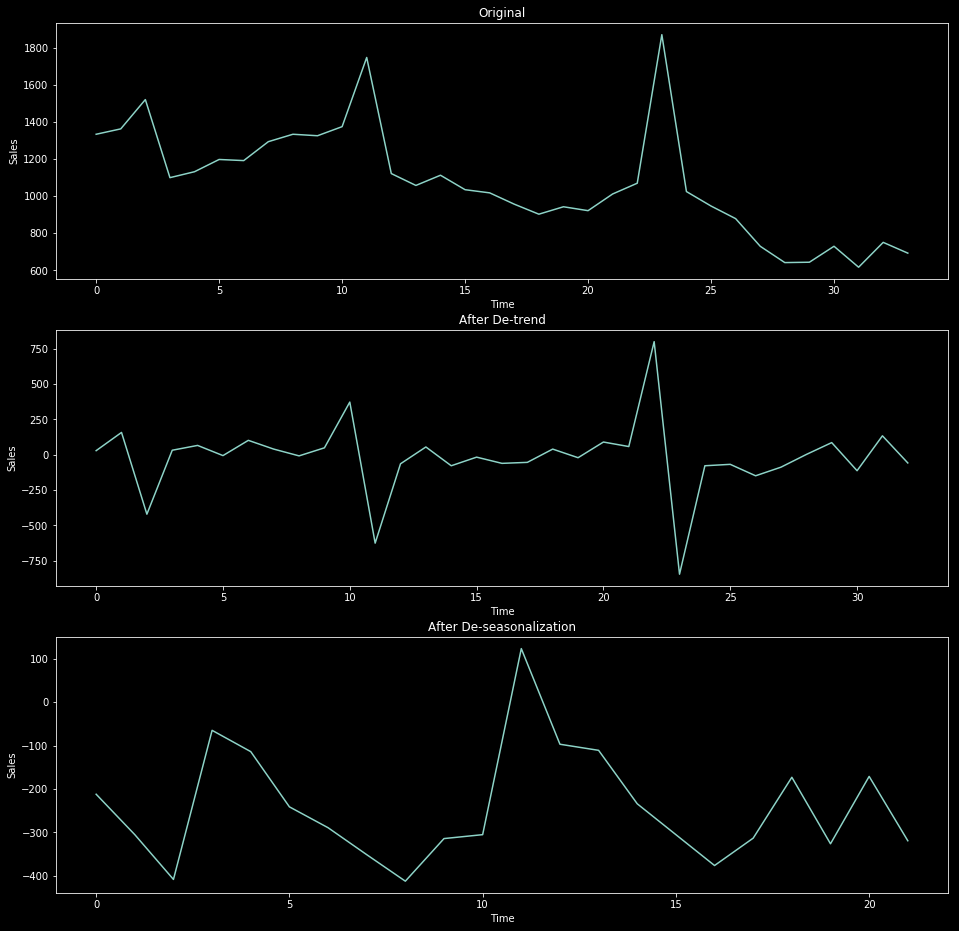

In [72]:
timeseries = df.groupby(["date_block_num"])["item_cnt_day"].sum()

plt.figure(figsize=(16,16))
plt.subplot(311)
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(timeseries)

plt.subplot(312)
plt.title('After De-trend')
plt.xlabel('Time')
plt.ylabel('Sales')
new_timeseries = difference(timeseries)
plt.plot(new_timeseries)
plt.plot()

plt.subplot(313)
plt.title('After De-seasonalization')
plt.xlabel('Time')
plt.ylabel('Sales')
new_timeseries = difference(timeseries, 12)
plt.plot(new_timeseries)
plt.plot()

In [74]:
test_stationarity(new_timeseries)

Results of Dickey-Fuller Test:
Test Statistic                -1.46
p-value                        0.55
#Lags Used                     9.00
Number of Observations Used   12.00
Critical Value (1%)           -4.14
Critical Value (5%)           -3.15
Critical Value (10%)          -2.71
dtype: float64
